<a href="https://colab.research.google.com/github/marziyeh-sa/Machine_Learning_Fall2020/blob/main/Hands_On/HO4_Parametric_Density_Estimation_ML2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="images/Tehran-Uni-Transparent.png" alt="UT logo" width="120" height="120" align="left">

<img src="images/Fanni-Transparent.png" width="120" height="120" align="right">

<h1><center><font size=5> <b><i>Machine Learning (Fall 2020)</b><br>Hands-On #4<br>Parametric Density Estimation</i></font></center></h1>

## 0. Importing Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("star-dataset.zip")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
ndf = df.iloc[:,[0,1,2,3,4]] 
#ndf
#df0 = ndf[ndf.iloc[:,-1] == 0]
df1 = ndf[ndf.iloc[:,-1] == 1]   #Class #1
#df2 = ndf[ndf.iloc[:,-1] == 2]
#df3 = ndf[ndf.iloc[:,-1] == 3]
#df4 = ndf[ndf.iloc[:,-1] == 4]
#df5 = ndf[ndf.iloc[:,-1] == 5]
nndf = df1.iloc[:,[2,3]] 
nndf

,Radius(R/Ro),Absolute magnitude(Mv)
10,0.5100,10.690
11,0.3761,11.790
12,0.1960,13.210
13,0.3930,10.480
14,0.1400,11.782
15,0.2400,13.070
16,0.1600,14.790
17,0.4700,10.800
18,0.1967,13.530
19,0.3510,11.180


## 1. Maximum Likelihood

The Gaussian Case: Unknown $\mu$ and $\Sigma$:
$$\hat{\mu} = \frac{1}{n} \sum_{k=1}^nx_k$$
$$\hat{\Sigma} =\frac{1}{n} \sum_{k=1}^n\left(x_k - \hat{\mu} \right)\left(x_k - \hat{\mu} \right)^T$$

#### 1.1. Method #1:
The empirical covariance matrix of a sample can be computed using the `empirical_covariance` function of the package

#### 1.2. Method #2
The empirical covariance matrix and mean vector of a sample can be computed by fitting an `EmpiricalCovariance` object to the data sample with the `EmpiricalCovariance.fit` method

In [ ]:
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(nndf)
print('\u03BC = ', cov.location_, sep="\n")
print('\u03A3 = ', cov.covariance_, sep="\n")

μ = 
[ 0.348145 12.539975]
Σ = 
[[0.02325924 0.01464045]
 [0.01464045 1.97379462]]


#### 1.3. Method #3
Using `GaussianMixture` with `n_components = 1`

## 2. Bayesian Density Estimation
The `BayesianGaussianMixture` object implements a variant of the Gaussian mixture model with variational inference algorithms. The API is similar as the one defined by GaussianMixture.
***
The principle behind variational methods is the same as expectation-maximization (that is both are iterative algorithms that alternate between finding the probabilities for each point to be generated by each mixture and fitting the mixture to these assigned points), but variational methods add regularization by integrating information from prior distributions.

The Gaussian Case: Unknown $\mu$ and known $\Sigma$:

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
BDE = BayesianGaussianMixture(n_components=1,covariance_type='full').fit(nndf)
print('\u03BC = ', BDE.means_, sep="\n")
print('\u03A3 = ', BDE.covariances_, sep="\n")

μ = 
[[ 0.348145 12.539975]]
Σ = 
[[[0.0227206  0.01430081]
  [0.01430081 1.92800547]]]


## 3. Expectation Maximization
The `GaussianMixture` object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.

In [ ]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components=2, covariance_type='full').fit(nndf)
print('\u03BC = ', EM.means_, sep="\n")
print('\u03A3 = ', EM.covariances_, sep="\n")

μ = 
[[ 0.35554919 13.73771429]
 [ 0.34091749 11.37081659]]
Σ = 
[[[ 0.03676235  0.05290851]
  [ 0.05290851  0.58088199]]

 [[ 0.00997456 -0.03982121]
  [-0.03982121  0.5661927 ]]]


(9.107999999999999, 16.434)

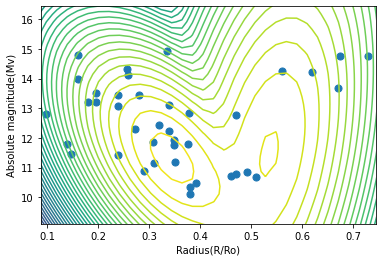

In [ ]:
import matplotlib.pyplot as plt
nndf.plot.scatter(x= 'Radius(R/Ro)', y= 'Absolute magnitude(Mv)', s=50);
xmin = nndf['Radius(R/Ro)'].min()
xmax = nndf['Radius(R/Ro)'].max()
ymin = nndf['Absolute magnitude(Mv)'].min()
ymax = nndf['Absolute magnitude(Mv)'].max()
#x = np.linspace(xmin, xmax, 35)
#y = np.linspace(ymin, ymax, 35)
x = np.linspace(0.8*xmin, 1.2*xmax, 40)
y = np.linspace(0.8*ymin, 1.2*ymax, 40)
Z = np.zeros((np.size(x), np.size(y)))
[X, Y] =np.meshgrid(x, y)
for i in range(np.size(x)):
  for j in range(np.size(y)):
    Z[i][j] = EM.score([[x[i],y[j]]])
plt.contour(X, Y, Z,50)
plt.xlim(0.9*xmin, 1.02*xmax)
plt.ylim(0.9*ymin, 1.1*ymax)

## 4. Hidden Markov Models

For more information on Hidden Markov Models refer to the third chapter of [this reference](https://www.springer.com/gp/book/9781447157786).<br>
`hmm.GaussianHMM`	| Hidden Markov Model with Gaussian emissions.<br>
`hmm.GMMHMM`	| Hidden Markov Model with Gaussian mixture emissions.<br>
`hmm.MultinomialHMM`	| Hidden Markov Model with multinomial (discrete) emissions.
***
The HMM is a generative probabilistic model, in which a sequence of observable X variables is generated by a sequence of internal hidden states Z. The hidden states are not observed directly. The transitions between hidden states are assumed to have the form of a (first-order) Markov chain. They can be specified by the start probability vector π and a transition probability matrix A. The emission probability of an observable can be any distribution with parameters θ conditioned on the current hidden state.
The HMM is completely determined by π, A and θ.
There are three fundamental problems for HMMs:<br>
1. Given the model parameters and observed data, estimate the optimal sequence of hidden states.<br>
2. Given the model parameters and observed data, calculate the model likelihood.<br>
3. Given just the observed data, estimate the model parameters.<br>

### 4.0. Package Installation
Open Anaconda Prompt and use one of following commands.<br>
To install from PyPI:<br>
`pip install --upgrade --user hmmlearn`<br>
To install from the repo:<br>
`pip install --user git+https://github.com/hmmlearn/hmmlearn`

### 4.1. Multinomial Emissions (Discrete)
In this Example We Define a Transition Probability Matrix.

[//]: ![title](images/hmmi.png)
<img src="images/hmmi.png" alt="Drawing" style="width: 800px;"/>

In [ ]:
import numpy as np
from hmmlearn import hmm
pi = np.array([0.6, 0.4])
A = np.array([[0.4, 0.6], [0.3, 0.7]])
B = np.array([[0.3, 0.2, 0.5],
              [0.1, 0.7, 0.2]])
model = hmm.MultinomialHMM(n_components = 2)   #n_components = n_hidden_states
model.startprob = pi                           #model.startprob = start_probability
model.transmat = A                             #model.transmat = transition_probability
model.emissionprob = B                         #model.emissionprob = emission_probability

# predict a sequence of hidden states based on visible states
sto = np.array([[0, 2, 1, 1, 2, 0]]).T

model = model.fit(sto)
logprob, hs = model.decode(sto, algorithm="viterbi")
print("Observation:", sto.T)
print("States:", hs)

### 4.2. Gaussian Emissions (Continuous)
In this Example We Define 3 2D-Gaussian Sources for Emmissions.

In [ ]:
Gmodel = hmm.GaussianHMM(n_components = 3, covariance_type ="full")
Gmodel.startprob_ = np.array([0.6, 0.3, 0.1])
Gmodel.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
Gmodel.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
Gmodel.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = Gmodel.sample(10)   #Generating samples
print("Observation:", X, sep="\n")
print("States:", Z, sep="\n")

Observation:
[[ 2.76613905 -2.71746934]
 [ 3.01415049 -3.1145004 ]
 [ 4.87930255 11.11944679]
 [ 5.9043349  11.03535863]
 [ 6.25520473 10.98435177]
 [ 4.16109133 10.09614359]
 [ 0.1262955  -1.66638523]
 [ 2.76665146 -2.71172193]
 [ 1.6777925   1.25125041]
 [-0.05364883 -0.57275741]]
States:
[1 1 2 2 2 2 0 1 0 0]
